C:\Users\rnmsc\anaconda3\envs\pyvistaxarray\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


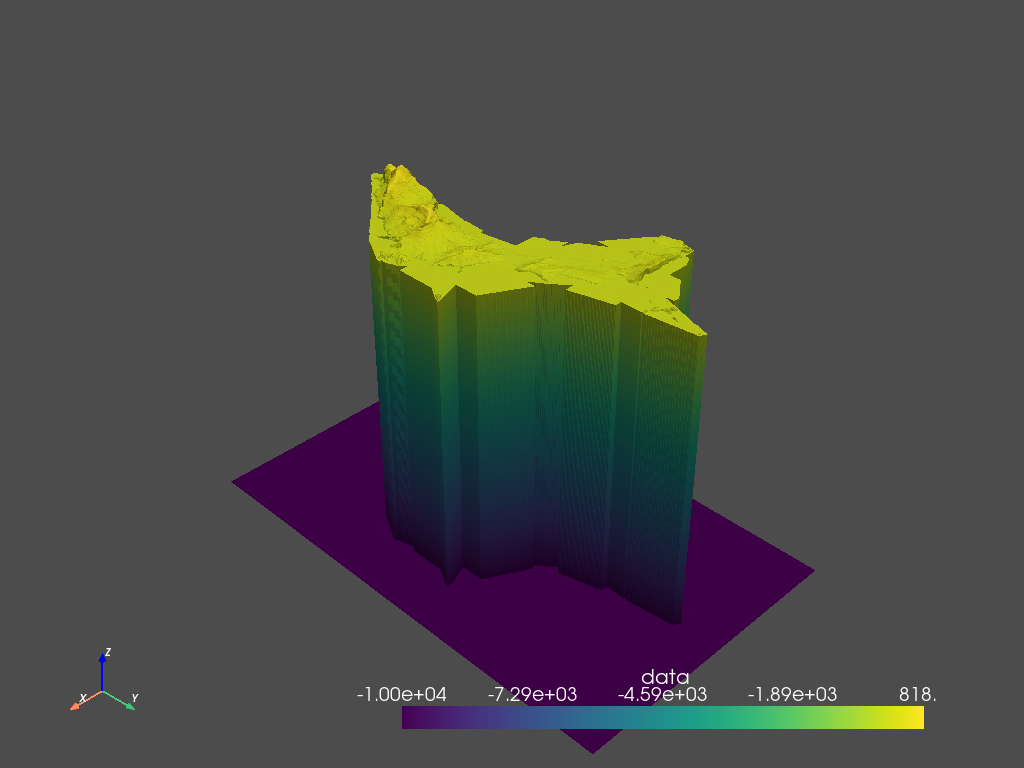

In [39]:
import rioxarray
import pvxarray
import xarray as xr

da = rioxarray.open_rasterio(r"E:\DATA_44842\NSW Government - Spatial Services\DEM\1 Metre\Lord_Howe_Island_10m.tif")


# Grab the mesh object for use with PyVista
mesh = da.squeeze().pyvista.mesh(x="x", y="y")

# Warp top and plot in 3D
mesh.warp_by_scalar().plot()

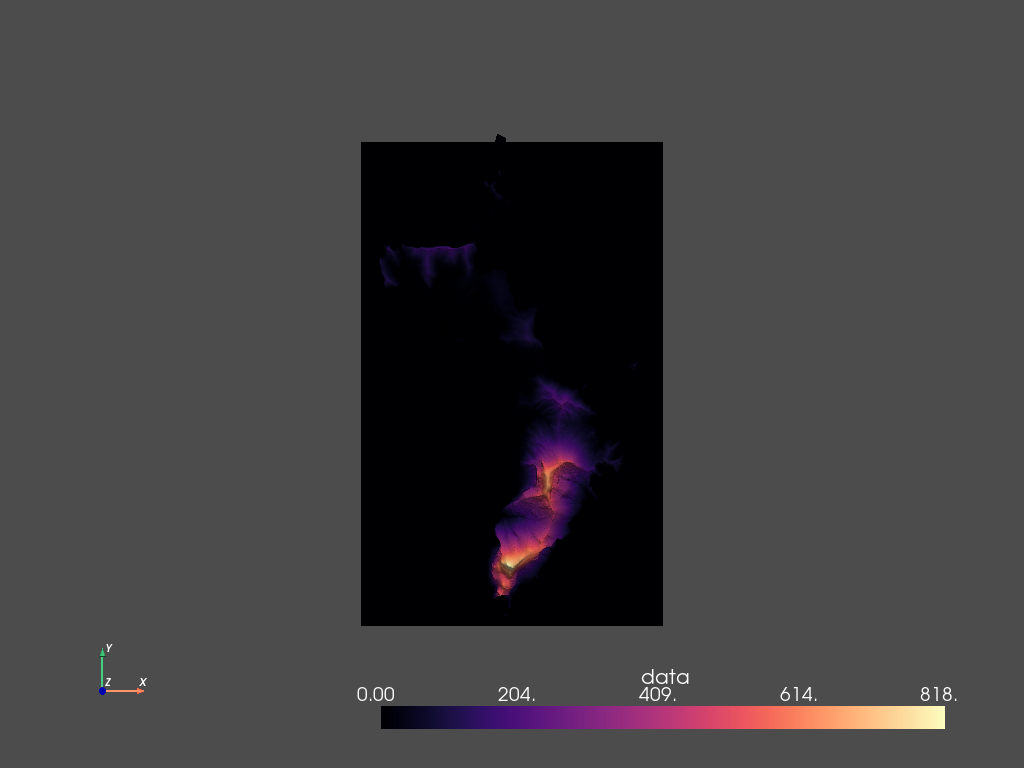

In [37]:
mesh.warp_by_scalar().plot(cpos='xy',clim=[0,818],cmap='magma')

In [5]:
mesh

RectilinearGrid (0x1dc1eac73a0)
  N Cells:	1597401
  N Points:	1600000
  X Bounds:	5.020e+05, 5.120e+05
  Y Bounds:	6.502e+06, 6.518e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	1000, 1600, 1
  N Arrays:	1

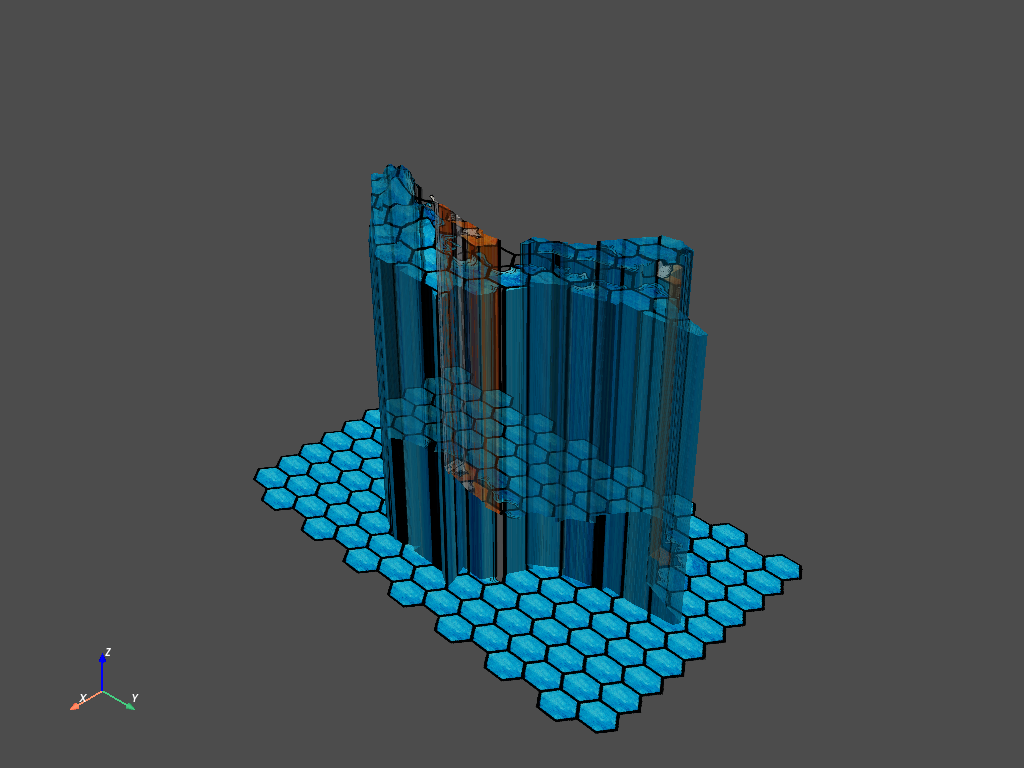

In [9]:
import pyvista as pv
image_file = r'E:\DATA_44842\NSW Government - Spatial Services\DEM\1 Metre\LordHoweIslandMap1.png'
tex = pv.read_texture(image_file)
mesh.texture_map_to_plane(inplace=True)

mesh.warp_by_scalar('data').plot(texture=tex)

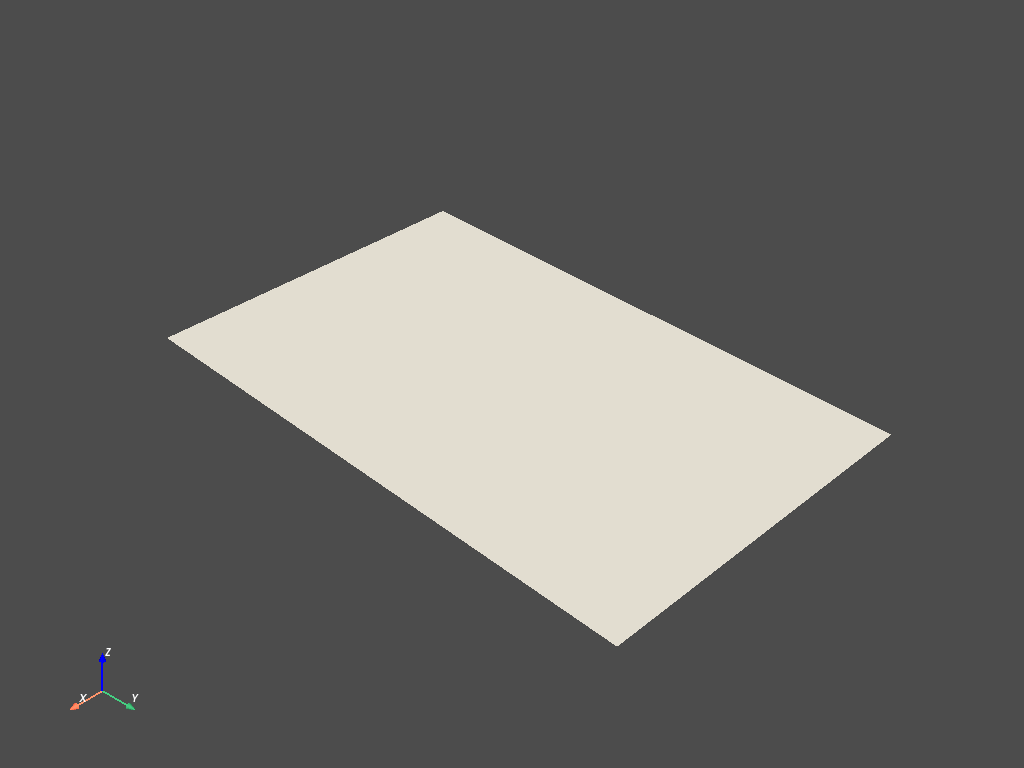

In [7]:
mesh.plot()

In [11]:
meshtop = mesh.clip_scalar(scalars='data', invert=False, value=0.0)

In [12]:
meshtop

UnstructuredGrid (0x160978736a0)
  N Cells:	321911
  N Points:	323023
  X Bounds:	5.035e+05, 5.104e+05
  Y Bounds:	6.504e+06, 6.517e+06
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	2

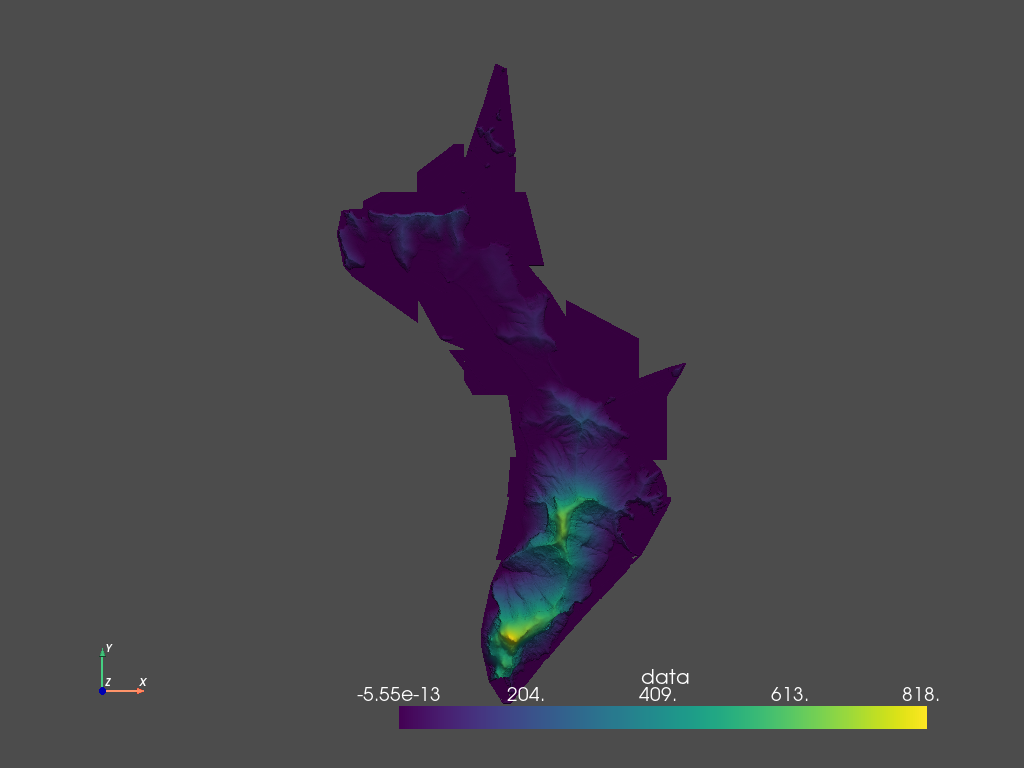

In [18]:
meshtop.warp_by_scalar('data').plot(cpos='xy')

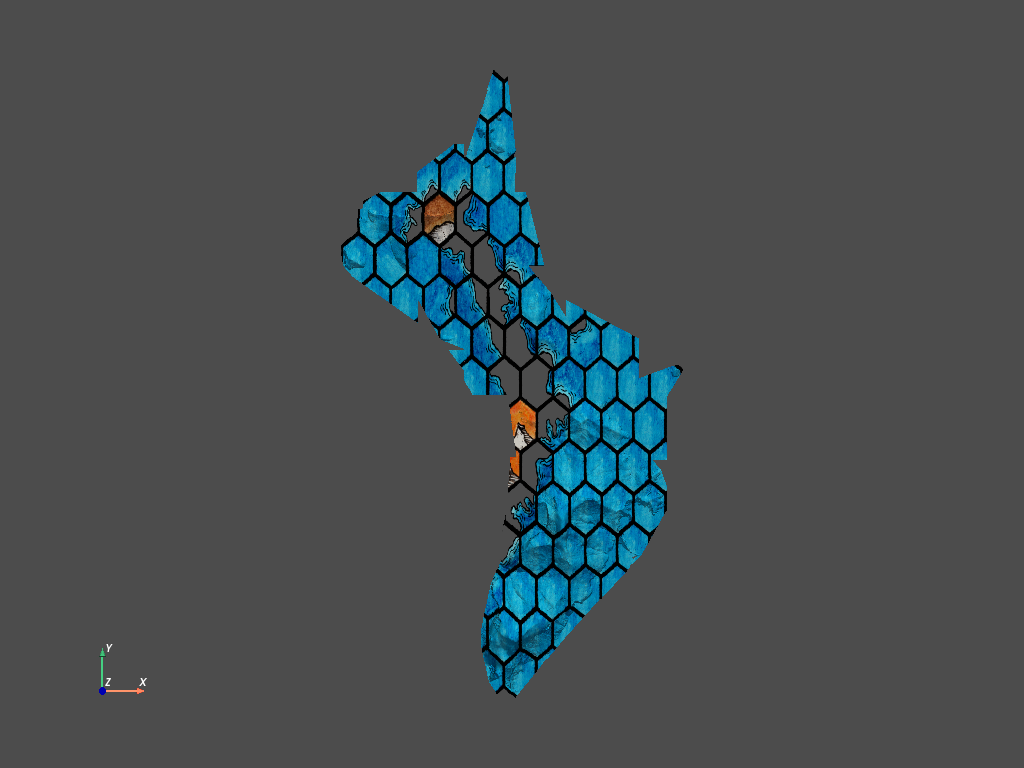

In [20]:
meshtop.texture_map_to_plane(inplace=True)
meshtop.warp_by_scalar('data').plot(cpos='xy',texture=tex)

In [21]:
meshtop['z'] = meshtop['data']

In [30]:
import numpy as np
meshtop.z = np.unique(meshtop['data'])

In [31]:
meshtop

UnstructuredGrid (0x160978736a0)
  N Cells:	321911
  N Points:	323023
  X Bounds:	5.035e+05, 5.104e+05
  Y Bounds:	6.504e+06, 6.517e+06
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	3

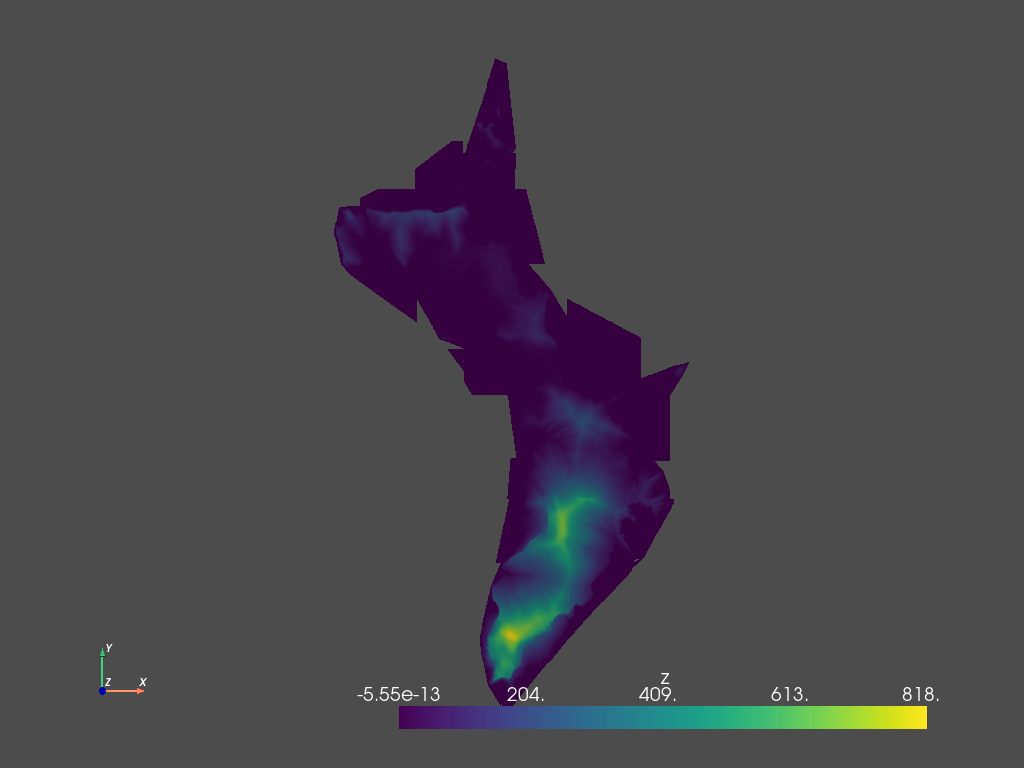

In [25]:
meshtop.plot(cpos='xy')

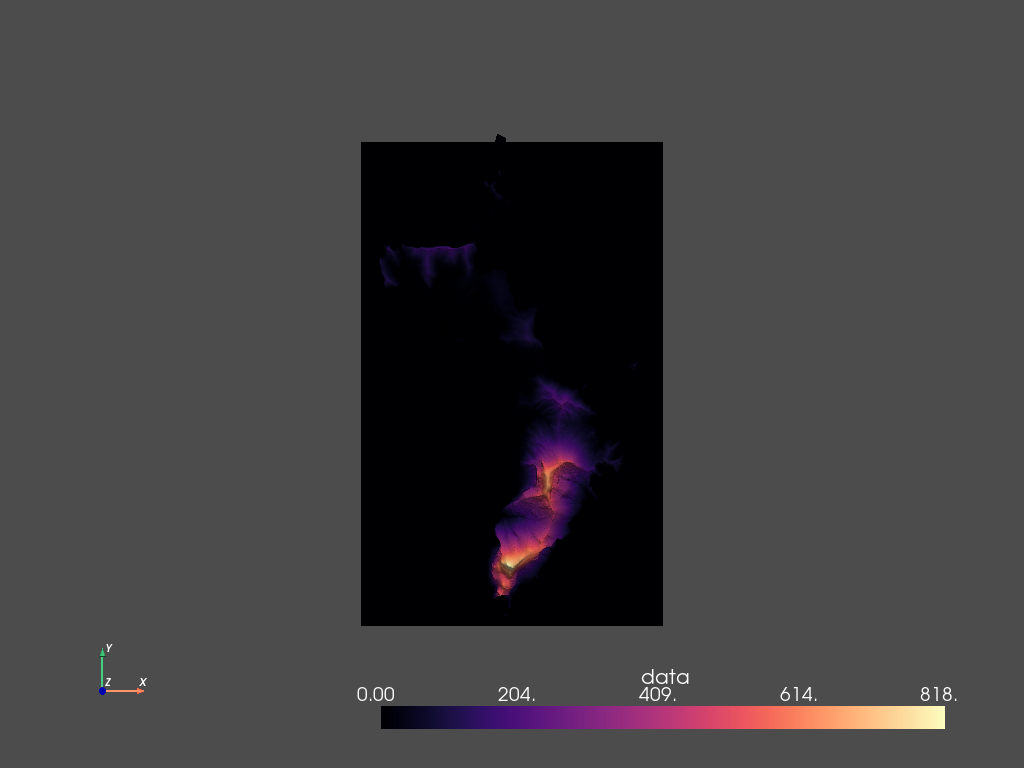

In [41]:
mesh.warp_by_scalar().plot(cpos='xy',clim=[0,818],cmap='magma',notebook=True)